### 1. Imports

In [17]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import yfinance as yf
import ta

### 2. Téléchargement des données

In [2]:
# Paramètres
TICKER = '^GSPC'
INTERVAL = '5m'
PERIOD = '1mo'

In [3]:
gspc_data = yf.download(
    TICKER,
    interval=INTERVAL,
    period=PERIOD,
    progress=False
)

In [4]:
print("Aperçu des données brutes :")
display(gspc_data.head())

Aperçu des données brutes :


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Datetime,,,,,
2024-12-27 15:45:00+00:00,5966.779785,5968.290039,5959.370117,5963.160156,0
2024-12-27 15:50:00+00:00,5970.299805,5970.299805,5965.189941,5966.729980,17629871
2024-12-27 15:55:00+00:00,5963.870117,5970.430176,5962.720215,5970.430176,16525941
2024-12-27 16:00:00+00:00,5953.080078,5964.259766,5952.770020,5963.990234,19204897
2024-12-27 16:05:00+00:00,5954.189941,5956.750000,5951.899902,5953.229980,17415704


In [5]:
print("\nForme de gspc_data :", gspc_data.shape)
print("Type de gspc_data['Close'] :", type(gspc_data['Close']))


Forme de gspc_data : (1405, 5)
Type de gspc_data['Close'] : <class 'pandas.core.frame.DataFrame'>


### 3. Feature Engineering (indicateurs techniques)

In [6]:
feature = pd.DataFrame(index = gspc_data.index)

# Convertir en Série (index, )
close_prices = gspc_data['Close'].squeeze()
high_prices = gspc_data['High'].squeeze()
low_prices = gspc_data['Low'].squeeze()
volume_prices = gspc_data['Volume'].squeeze()

# Calcul des métriques
feature['SMA'] = ta.trend.sma_indicator(close_prices, window=14)
feature['MACD'] = ta.trend.macd(close_prices)
feature['RSI'] = ta.momentum.rsi(close_prices)
feature['Close'] = close_prices
feature['Bollinger_Upper'], feature['Bollinger_Lower'] = ta.volatility.bollinger_hband(close_prices), ta.volatility.bollinger_lband(close_prices)
feature['ATR'] = ta.volatility.average_true_range(high_prices, low_prices,close_prices)
feature['ADX'] = ta.trend.adx(high_prices, low_prices, close_prices)
feature['OBV'] = ta.volume.on_balance_volume(close_prices, volume_prices)

# Copie dans gspc_data
gspc_data['SMA'] = feature['SMA']
gspc_data['MACD'] = feature['MACD']
gspc_data['RSI'] = feature['RSI']
gspc_data['Bollinger_Upper'] = feature['Bollinger_Upper']
gspc_data['Bollinger_Lower'] = feature['Bollinger_Lower']
gspc_data['ATR'] = feature['ATR']
gspc_data['ADX'] = feature['ADX']
gspc_data['OBV'] = feature['OBV']

In [7]:
feature

,SMA,MACD,RSI,Close,Bollinger_Upper,Bollinger_Lower,ATR,ADX,OBV
Datetime,,,,,,,,,
2024-12-27 15:45:00+00:00,NaN,NaN,NaN,5966.779785,NaN,NaN,0.000000,0.000000,0
2024-12-27 15:50:00+00:00,NaN,NaN,NaN,5970.299805,NaN,NaN,0.000000,0.000000,17629871
2024-12-27 15:55:00+00:00,NaN,NaN,NaN,5963.870117,NaN,NaN,0.000000,0.000000,1103930
2024-12-27 16:00:00+00:00,NaN,NaN,NaN,5953.080078,NaN,NaN,0.000000,0.000000,-18100967
2024-12-27 16:05:00+00:00,NaN,NaN,NaN,5954.189941,NaN,NaN,0.000000,0.000000,-685263
...,...,...,...,...,...,...,...,...,...
2025-01-27 15:25:00+00:00,6013.505790,-25.146191,36.019367,6010.319824,6129.855340,5944.138801,11.930008,54.765419,1777836798
2025-01-27 15:30:00+00:00,6007.692208,-23.110729,38.865449,6015.189941,6122.501797,5943.595322,11.586444,54.109905,1819742485
2025-01-27 15:35:00+00:00,6001.385777,-21.464829,37.874395,6012.529785,6114.893166,5943.366941,11.230974,53.437118,1778744485


In [8]:
gspc_data

Price,Close,High,Low,Open,Volume,SMA,MACD,RSI,Bollinger_Upper,Bollinger_Lower,ATR,ADX,OBV
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,,,,,
Datetime,,,,,,,,,,,,,
2024-12-27 15:45:00+00:00,5966.779785,5968.290039,5959.370117,5963.160156,0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
2024-12-27 15:50:00+00:00,5970.299805,5970.299805,5965.189941,5966.729980,17629871,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,17629871
2024-12-27 15:55:00+00:00,5963.870117,5970.430176,5962.720215,5970.430176,16525941,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1103930
2024-12-27 16:00:00+00:00,5953.080078,5964.259766,5952.770020,5963.990234,19204897,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-18100967
2024-12-27 16:05:00+00:00,5954.189941,5956.750000,5951.899902,5953.229980,17415704,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-685263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27 15:25:00+00:00,6010.319824,6011.299805,6000.149902,6002.910156,43354399,6013.505790,-25.146191,36.019367,6129.855340,5944.138801,11.930008,54.765419,1777836798
2025-01-27 15:30:00+00:00,6015.189941,6015.189941,6008.069824,6010.350098,41905687,6007.692208,-23.110729,38.865449,6122.501797,5943.595322,11.586444,54.109905,1819742485


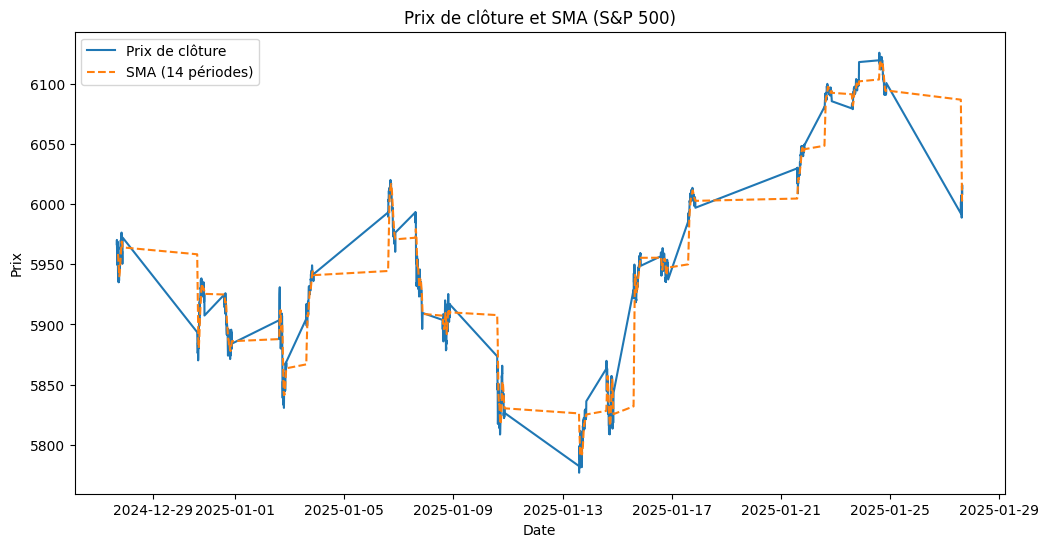

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(gspc_data['Close'], label='Prix de clôture')
plt.plot(gspc_data['SMA'], label='SMA (14 périodes)', linestyle='--')
plt.title('Prix de clôture et SMA (S&P 500)')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

### 4. Nettoyage

In [10]:
# Suppression des lignes contenant des valeurs nulles
feature.dropna(inplace=True)
gspc_data.dropna(inplace=True)

In [11]:
print("\nForme après dropna :")
print("feature :", feature.shape)
print("gspc_data :", gspc_data.shape)


Forme après dropna :
feature : (1380, 9)
gspc_data : (1380, 13)


In [12]:
features = feature.drop(columns=['Close'])  # Exclure Close (la cible)
target = feature['Close']  # Garder Close comme cible

In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
pca = PCA(n_components=0.9)  # Garde les composantes expliquant 90% de la variance
features_pca = pca.fit_transform(features_scaled)
# Résultat après ACP
print(f"Forme des données après ACP : {features_pca.shape}")

Forme des données après ACP : (1380, 4)


In [15]:
# Créer un nouveau DataFrame avec les composantes principales
df_pca = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(features_pca.shape[1])])

# Ajouter la cible (Close) pour créer le jeu de données final
df_final = pd.concat([df_pca, target.reset_index(drop=True)], axis=1)

In [16]:
df_final

,PC1,PC2,PC3,PC4,Close
0,-1.403333,0.856831,-2.680629,-1.321891,5943.149902
1,-1.325378,0.663047,-2.689698,-1.323257,5945.439941
2,-0.864499,0.505574,0.226711,-1.916577,5952.040039
3,-0.983145,0.725221,0.048840,-1.862095,5946.120117
4,-0.923006,0.485386,-0.114305,-1.844814,5949.490234
...,...,...,...,...,...
1375,0.886363,3.656781,3.656183,1.592797,6010.319824
1376,0.971780,3.290387,3.592975,1.687244,6015.189941
1377,0.930499,3.164427,3.461425,1.642649,6012.529785
1378,1.043383,2.863014,3.367824,1.719889,6016.060059


### 5. Sauvegarder les données en local

In [18]:
os.makedirs("data", exist_ok=True)

In [19]:
output_filename = f"{TICKER}_{INTERVAL}_{PERIOD}.csv"
output_path = os.path.join("data", output_filename)

In [20]:
df_final.to_csv(output_path, index=False)